In [79]:
from sklearn import datasets

iris = datasets.load_iris()

In [80]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [81]:
import pandas as pd

In [82]:
ires_data=pd.DataFrame(columns=iris["feature_names"],data=iris["data"])
ires_data.shape

(150, 4)

In [83]:
ires_targets=pd.DataFrame(columns=["targets"],data=iris["target"])
ires_targets.shape

(150, 1)

In [84]:
ires_targets["targets"].unique()

array([0, 1, 2])

In [85]:
import matplotlib.pyplot as plt

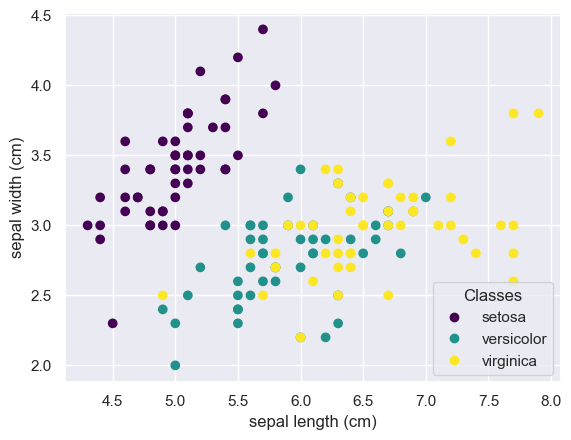

In [86]:
_, ax = plt.subplots()

scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target,cmap='viridis')

ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])

_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)


In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ires_data,ires_targets,test_size=0.2,random_state=2)

In [88]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
126,6.2,2.8,4.8,1.8
23,5.1,3.3,1.7,0.5
64,5.6,2.9,3.6,1.3
117,7.7,3.8,6.7,2.2
84,5.4,3.0,4.5,1.5
...,...,...,...,...
75,6.6,3.0,4.4,1.4
43,5.0,3.5,1.6,0.6
22,4.6,3.6,1.0,0.2
72,6.3,2.5,4.9,1.5


In [89]:
x_train.shape,y_train.shape

((120, 4), (120, 1))

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [91]:
knn=KNeighborsClassifier()
RF=RandomForestClassifier()
lor=LogisticRegression()

In [92]:
knn.fit(x_train,y_train)
lor.fit(x_train,y_train)
RF.fit(x_train,y_train)

c:\Users\mshar\.conda\envs\gpupy310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\mshar\.conda\envs\gpupy310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mshar\.conda\envs\gpupy310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
print("accuracy for knn  is",accuracy_score(knn.predict(x_test),y_test))
print("accuracy for random forest  is",accuracy_score(RF.predict(x_test),y_test))
print("accuracy for logistic regression is",accuracy_score(lor.predict(x_test),y_test))

accuracy for knn  is 1.0
accuracy for random forest  is 0.9666666666666667
accuracy for logistic regression is 0.9666666666666667


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
r2_score(lr.predict(x_test),y_test)

0.930519907968746

In [95]:
# now using voting ensamble learning

KNN=KNeighborsClassifier()
RF=RandomForestClassifier()
LOR=LogisticRegression()

In [96]:
from sklearn.ensemble import VotingClassifier

In [97]:
# we have to pass the list of tuple contaning (string, model) in voting ensemble
estimators=[("knn",KNN),("random forest",RF),("logistic regression",LOR)]

In [98]:
vc=VotingClassifier(estimators=estimators,voting='soft') # voting = "soft" or "hard"

In [99]:
vc.fit(x_train,y_train)

c:\Users\mshar\.conda\envs\gpupy310\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mshar\.conda\envs\gpupy310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('random forest', RandomForestClassifier()),
                             ('logistic regression', LogisticRegression())],
                 voting='soft')

In [100]:
print("accuracy for voting ensamble is",accuracy_score(vc.predict(x_test),y_test))

accuracy for voting ensamble is 0.9666666666666667


In [101]:
#using cross validation 

from sklearn.model_selection import cross_val_score

In [102]:
%%capture
cross_validate_list=cross_val_score(vc,x_train,y_train,cv=10,scoring="accuracy")

In [103]:
import numpy as np
print("the avg accuracy on the train data is ",np.mean(cross_validate_list))

the avg accuracy on the train data is  0.9583333333333333
